# STATISTICS & MACHINE LEARNING

## Comparison of Normal, Exponential and Bernoulli distributions

### Randomly sample data from the following distributions
- Normal, exponential, bernoulli
- Then use python to fit the distribution, given the data.
Assess how accurate the fit is (define this yourself, justify)
as a function of the number of datapoints sampled
- Does the fit vary as a function of the true parameter? 

## 1) Normal Distribution (Gaussian Distribution)

*** Generate an array of 200 random sample from a normal dist with mean 0 and stdv 1. ***

*** In this case we make use of "norm.rvs(loc,scale)" function to call a set of random variables with loc meaning the mean and scale meaning the standard deviation. ***



In [2]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

random_sample = norm.rvs(loc=0,scale=1,size=200) 

*** The next step is to sample our data to Normal Distribution. ***

*** We make use of "norm.fit(data)" function to fit the data normally. ***

*** norm.fit(data) returns a list of two parameters. ***

*** (mean, parameters[0] and std, parameters[1]) via a MLE approach to data, which should be in array form. ***

In [3]:
parameters = norm.fit(random_sample)

*** Now, parameters[0] and parameters[1] are the mean and the standard deviation of the fitted distribution. ***

In [4]:
x = np.linspace(-5,5,100)

### What is PDF ?
- PDF stands for Probability Density Function
- It is a function of a continuous random variable, whose integral across an interval gives the probability that the value of the variable lies within the same interval.

*** Now, we make use of "norm.pdf" function to normally fit the sample of random numbers. ***

In [5]:
fitted_pdf = norm.pdf(x,loc = parameters[0],scale = parameters[1])
normal_pdf = norm.pdf(x)

*** Finally, we plot the graph so as to check the accuracy and compare the random sample of data with normally distributed data.***

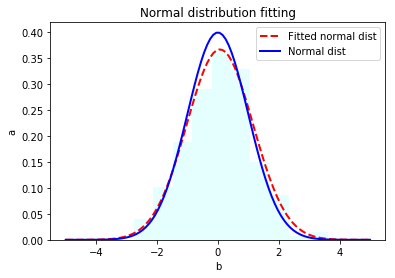

True

In [14]:
plt.plot(x,fitted_pdf,"red",label="Fitted normal dist",linestyle="dashed", linewidth=2)
plt.plot(x,normal_pdf,"blue",label="Normal dist", linewidth=2)

plt.hist(random_sample,normed=1,color="cyan",alpha=.1) 
plt.title("Normal distribution fitting")
plt.legend()
plt.ylabel('a')
plt.xlabel('b')

# we plot the normal distribution
plt.show()

vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

*** Calculating accuracy for Normal distribution. ***

In [123]:
from sklearn.metrics import mean_squared_error
a=mean_squared_error(x, norm.cdf(x))
accuracy_normal = 100-a
accuracy_normal

93.480339692704277

## 2) Exponential Distribution


*** Exponential Distribution involves an exponential continuous random variable.***

*** As an instance of the rv_continuous class, expon object inherits from it a collection of generic methods and completes them with details specific for this particular distribution. ***

*** The probability density function for expon is: expon.pdf(x) = exp(-x). ***

*** The probability density above is defined in the “standardized” form. ***

*** To shift and/or scale the distribution use the loc and scale parameters.***

*** Specifically, expon.pdf(x, loc, scale) is identically equivalent to expon.pdf(y) / scale with y = (x - loc) / scale.***


*** A common parameterization for expon is in terms of the rate parameter lambda, 
such that pdf = lambda * exp(-lambda * x). ***

*** This parameterization corresponds to using scale = 1 / lambda. ***

In [115]:
from scipy.stats import expon
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1)

*** Now,we calculate the first few moments for Exponential Distribution.***

In [116]:
mean, var, skew, kurt = expon.stats(moments='mvsk')

*** We make use of numpy linspace to generate mean and standard deviation for the distribution with 100 random values. ***

In [77]:
x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x),
       'r-', lw=5, alpha=0.6, label='Exponentialy fitted pdf')

In [78]:
rv = expon()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='Exponential disttibution')

*** Calculating accuracy for Exponential distribution. ***

In [124]:
from sklearn.metrics import accuracy_score
a=mean_squared_error(x, expon.cdf(x))
accuracy = 100-a
accuracy

93.48039132894661

*** We generate a random set of values using "expon.rvs()" function for Exponential distribution. ***

In [80]:
r = expon.rvs(size=1000)

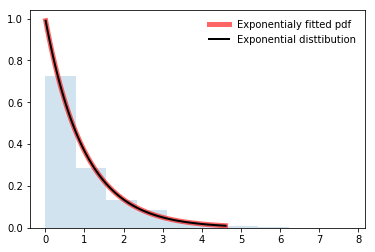

In [81]:
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

## 3) Bernoulli Distribution

*** It involves a Bernoulli discrete random variable. ***

*** Discrete random variables are defined from a standard form and may require some shape parameters to complete its specification. ***

In [125]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

*** Now, let's compute a set of random values using "bernoulli.rvs()" function. ***

*** Also we calculate first few moments by using "bernoulli.stats()". ***

In [99]:
p = 0.3
r = bernoulli.rvs(p, size=1000)
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')

In [100]:
x = np.arange(bernoulli.ppf(0.01, p),
              bernoulli.ppf(0.99, p))
ax.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='Bernoulli fitted')
ax.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)

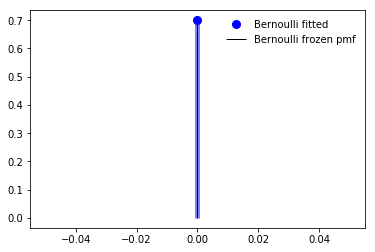

In [101]:
rv = bernoulli(p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='Bernoulli frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

*** Finally, we calculate an accuracy using below lines of code. ***

In [102]:
prob = bernoulli.cdf(x, p)
np.allclose(x, bernoulli.ppf(prob, p))

True

*** Calculating accuracy for Bernoulli distribution. ***

In [122]:
from sklearn.metrics import mean_squared_error
a=mean_squared_error(x, bernoulli.cdf(x,p))
accuracy_bernoulli = 100-a
accuracy_bernoulli

93.544265993265995

## References :
 http://firsttimeprogrammer.blogspot.com/2014/07/how-to-fit-data-to-normal-distribution.html
 
 https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.stats.expon.html
 
 https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.bernoulli.html